In [1]:
import torch
from torchvision.datasets import ImageNet
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

import glob
import os 
import matplotlib.pyplot as plt 

from u2nets import BGMask
import spur_datasets.waterbirds as wb

In [2]:
def show_batch(x, *args, num=8): # HELPFUL UTILITY FOR SHOWING IMAGES INLINE
    # Helper to show a batch of images 
    if isinstance(x, DataLoader):
        x = next(iter(x))[0]
    elif isinstance(x, Dataset):
        x = next(iter(DataLoader(x, batch_size=num, shuffle=True)))[0]
    sub_x = x[:num]
    im2show = torch.cat([_ for _ in x[:8]], dim=2).permute(1,2,0)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(im2show)

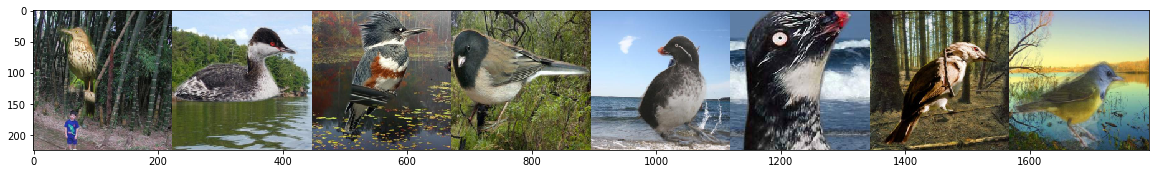

In [3]:
# Step 1: show bird dataset works 
wb_set = DataLoader(wb.BirdSet(), batch_size=8, shuffle=True)

show_batch(wb_set)
# Behold... birds! 

In [4]:
# Step 2: Show background image remover works okay-ish 
rand_bg = BGMask(background='r')
gray_bg = BGMask(background='g')

x, _ = next(iter(wb_set))


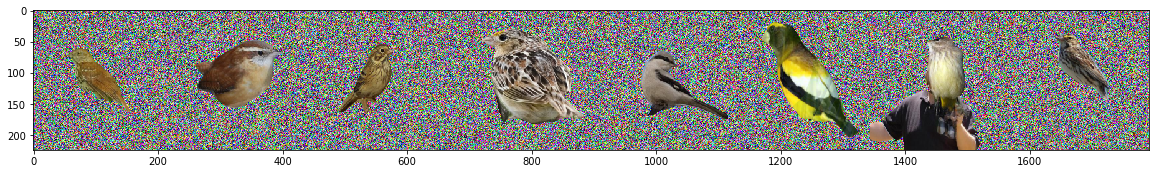

In [8]:
# rando background: 
show_batch(rand_bg(x))

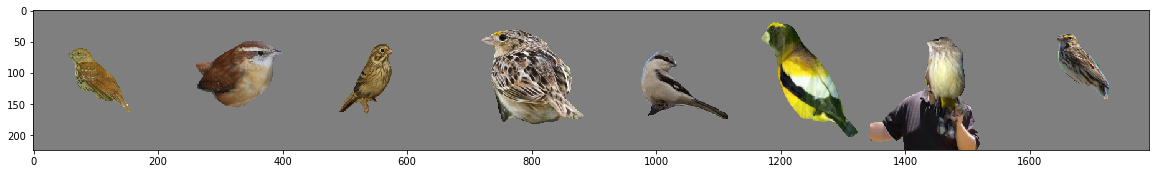

In [9]:
# Gray background 
show_batch(gray_bg(x))


In [ ]:
# Step 3: Show the use case as a transformer in dataset (maybe not efficient)

default_xform = wb.BirdSet().transform
print("DEFAULT XFORM\n", default_xform) # Default bird transform 
new_xform = transforms.Compose(default_xform.transforms + [rand_bg])


In [ ]:
bgless_birds = DataLoader(wb.BirdSet(transform=new_xform), batch_size=8, shuffle=True)
show_batch(next(iter(bgless_birds))[0].squeeze())